In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set_style()
rcParams['figure.figsize'] = 10, 6
import pandas as pd
import numpy as np


The BLS surveys a sample of 60,000 households, selected to be representative of the country. From this data, they make inferences about US civilian noninstitutional population 16 years and over.

The Bureau of Labor Statistics discusses their methodology in depth [here], but perhaps the most important thing to takeaway is how they calculate who's employed, who's unemployed, and who's, well, neither:
- People with jobs are employed.

- People who are jobless, looking for a job, and available for work are unemployed.

- The labor force is made up of the employed and the unemployed.

- People who are neither employed nor unemployed are not in the labor force.

Basically, you have a job, you don't have one and are looking for one, or you don't have one and are not looking.  The BLS notes that, among others, retirees, students and stay-at-home parents fall into that last group. Interestingly, they also mention that since 'the mid-1990s, typically fewer than 1 in 10 people not in the labor force reported that they want a job'. 

In a graph of data made up for demonstration purposes, the US civilian population might look like this:


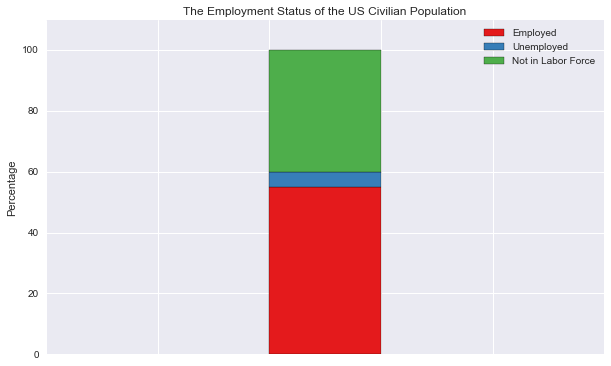

In [51]:
colors = sns.color_palette('Set1', n_colors=3)
p1 = plt.bar(2, height= 55, width=1, label='Employed', color=colors[0])
p2 = plt.bar(2, height= 5, width=1, label='Unemployed', bottom=55, color=colors[1])
p3 = plt.bar(2, height= 40, width=1, label='Not in Labor Force', bottom=60, color=colors[2])
plt.xlim([0,5])
plt.ylim([0, 110])
plt.tick_params(
    axis='x',          
    which='both',          
    bottom='off',           
    labelbottom='off')

plt.legend(loc='best')
plt.ylabel('Percentage')
plt.title('The Employment Status of the US Civilian Population')
plt.show()

In [52]:
employment_rate_df = pd.read_excel('employment_pop_ratio_national.xlsx', skiprows=11, header=0)
unemployment_rate_df = pd.read_excel('unemployment_rate_national.xlsx', skiprows=11, header=0)
labor_force_participation_rate_df = pd.read_excel('labor_force_participation_rate.xlsx', skiprows=11, header=0)

#https://www.bls.gov/cps/tables.htm#empstat_m -- more data
#https://www.bls.gov/cps/cpsaat01.xlsx - specific data accesses
#https://www.bls.gov/cps/cps_htgm.htm -- how government calculates unemployment
# Since the mid-1990s, typically fewer than 1 in 10 people not in the labor force reported that they want a job. 
employment_rate_df = employment_rate_df.set_index('Year')
unemployment_rate_df = unemployment_rate_df.set_index('Year')
labor_force_participation_rate_df = labor_force_participation_rate_df.set_index('Year')

employment_rate_df.index.name = None
unemployment_rate_df.index.name = None
labor_force_participation_rate_df.index.name = None
employment_rate_df.head()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1948,56.6,56.7,56.1,56.7,56.2,57.0,57.1,56.6,56.6,56.5,56.5,56.8,NaN
1949,56.2,56.2,56.0,55.7,55.4,55.0,55.0,55.1,55.3,54.9,55.6,55.3,NaN
1950,55.1,55.1,55.1,55.8,55.8,56.2,56.1,56.8,56.6,56.9,56.9,56.7,NaN
1951,56.9,57.0,57.7,57.3,57.6,57.1,57.6,57.4,57.1,57.3,57.1,57.7,NaN
1952,57.7,57.7,57.1,57.1,57.3,57.3,57.0,56.8,57.4,56.9,57.5,57.6,NaN


In [53]:
unemployment_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7


In [54]:
labor_force_participation_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1948,58.6,58.9,58.5,59.0,58.3,59.2,59.3,58.9,58.9,58.7,58.7,59.1
1949,58.7,59.0,58.9,58.8,59.0,58.6,58.9,59.2,59.1,59.6,59.4,59.2
1950,58.9,58.9,58.8,59.2,59.1,59.4,59.1,59.5,59.2,59.4,59.3,59.2
1951,59.1,59.1,59.8,59.1,59.4,59.0,59.4,59.2,59.1,59.4,59.2,59.6
1952,59.5,59.5,58.9,58.8,59.1,59.1,58.9,58.7,59.2,58.7,59.1,59.2


In [55]:
employment_rate_df['Annual'] = employment_rate_df.drop('Annual', axis=1).mean(axis=1)
employment_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1948,56.6,56.7,56.1,56.7,56.2,57.0,57.1,56.6,56.6,56.5,56.5,56.8,56.616667
1949,56.2,56.2,56.0,55.7,55.4,55.0,55.0,55.1,55.3,54.9,55.6,55.3,55.475000
1950,55.1,55.1,55.1,55.8,55.8,56.2,56.1,56.8,56.6,56.9,56.9,56.7,56.091667
1951,56.9,57.0,57.7,57.3,57.6,57.1,57.6,57.4,57.1,57.3,57.1,57.7,57.316667
1952,57.7,57.7,57.1,57.1,57.3,57.3,57.0,56.8,57.4,56.9,57.5,57.6,57.283333


In [56]:
unemployment_rate_df['Annual'] = unemployment_rate_df.mean(axis=1)
unemployment_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0,3.750000
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6,6.050000
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3,5.208333
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1,3.283333
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7,3.025000


In [57]:
labor_force_participation_rate_df['Annual'] = labor_force_participation_rate_df.mean(axis=1)
labor_force_participation_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1948,58.6,58.9,58.5,59.0,58.3,59.2,59.3,58.9,58.9,58.7,58.7,59.1,58.841667
1949,58.7,59.0,58.9,58.8,59.0,58.6,58.9,59.2,59.1,59.6,59.4,59.2,59.033333
1950,58.9,58.9,58.8,59.2,59.1,59.4,59.1,59.5,59.2,59.4,59.3,59.2,59.166667
1951,59.1,59.1,59.8,59.1,59.4,59.0,59.4,59.2,59.1,59.4,59.2,59.6,59.283333
1952,59.5,59.5,58.9,58.8,59.1,59.1,58.9,58.7,59.2,58.7,59.1,59.2,59.058333


In [58]:
fortyEightEmployment = employment_rate_df.iloc[0, :-1]
assert (fortyEightEmployment.sum() / fortyEightEmployment.size) == employment_rate_df.loc[1948, 'Annual']
fortyEightUnEmployment = unemployment_rate_df.iloc[0, :-1]
assert (fortyEightUnEmployment.sum() / fortyEightUnEmployment.size) == unemployment_rate_df.loc[1948, 'Annual']

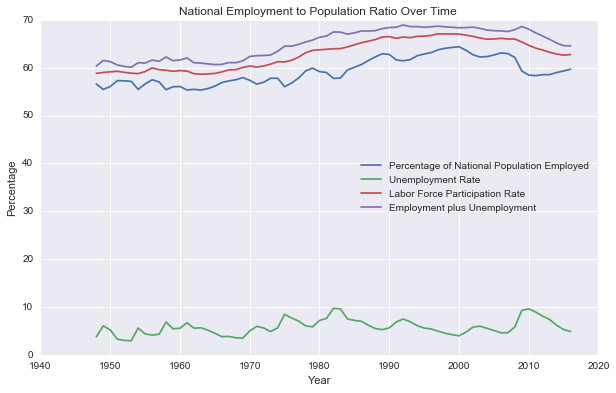

In [59]:
plt.plot(employment_rate_df.index.values, employment_rate_df.Annual.values, label='Percentage of National Population Employed')
plt.plot(unemployment_rate_df.index.values, unemployment_rate_df.Annual.values, label='Unemployment Rate')
plt.plot(labor_force_participation_rate_df.index.values, labor_force_participation_rate_df.Annual.values, label='Labor Force Participation Rate')
plt.plot(labor_force_participation_rate_df.index.values, employment_rate_df.Annual.values + unemployment_rate_df.Annual.values , label='Employment plus Unemployment')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('National Employment to Population Ratio Over Time ')
plt.legend(loc='best')
plt.ylim((0,70))
plt.show()

## Employment By Education
One thing that has been discussed endlessly our country's deep division, and perhaps the most talked-about division pertains to education level. Thus, I thought it would be interesting to examine employment data by education level.

Below we look at BLS employment data for groups with:
- less than a highschool degree
- a highschool degree
- some college education or an associate's degree
- a bachelor's degree or higher

In [7]:
#A helper function to parse the data sets.
def modDf(df):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = pd.melt(df,id_vars=['Year'], value_vars=months, var_name='month', value_name='rate')
    df['date'] = pd.to_datetime(df['month'] + " " + df['Year'].astype(str))
    df.sort_values('date', inplace=True)
    return df

#Read in the labor force participation rate data
lfpr_lths = modDf(pd.read_excel('lfpr_lths.xlsx', skiprows=12, header=0))
lfpr_c =  modDf(pd.read_excel('lfpr_c.xlsx', skiprows=12, header=0))
lfpr_sc =  modDf(pd.read_excel('lfpr_sc.xlsx', skiprows=12, header=0))
lfpr_hs = modDf(pd.read_excel('lfpr_hs.xlsx', skiprows=12, header=0))

#Read in the unemployment rate data
uer_lths = modDf(pd.read_excel('uer_lths.xlsx', skiprows=12, header=0))
uer_c =  modDf(pd.read_excel('uer_c.xlsx', skiprows=12, header=0))
uer_sc =  modDf(pd.read_excel('uer_sc.xlsx', skiprows=12, header=0))
uer_hs = modDf(pd.read_excel('uer_hs.xlsx', skiprows=12, header=0))

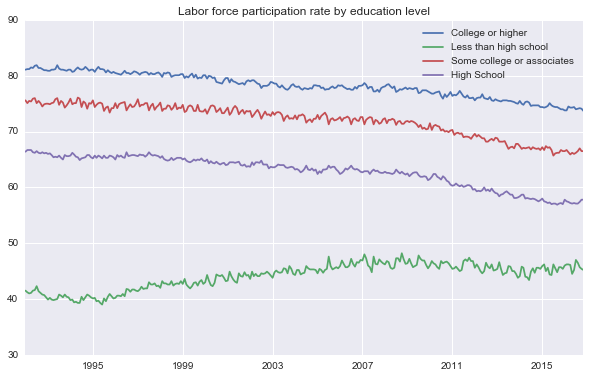

In [130]:
plt.plot(lfpr_c.date, lfpr_c.rate, label='College or higher')
plt.plot(lfpr_lths.date, lfpr_lths.rate, label='Less than high school')
plt.plot(lfpr_sc.date, lfpr_sc.rate, label='Some college or associates')
plt.plot(lfpr_hs.date, lfpr_hs.rate, label='High School')
plt.legend(loc='best')
plt.title('Labor force participation rate by education level')
plt.show()

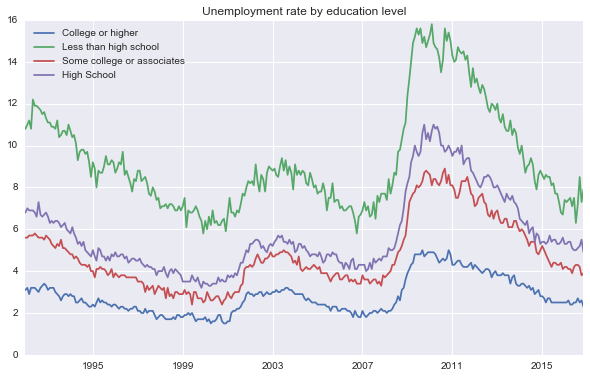

In [136]:
plt.plot(uer_c.date, uer_c.rate, label='College or higher')
plt.plot(uer_lths.date, uer_lths.rate, label='Less than high school')
plt.plot(uer_sc.date, uer_sc.rate, label='Some college or associates')
plt.plot(uer_hs.date, uer_hs.rate, label='High School')
plt.legend(loc='best')
plt.title('Unemployment rate by education level')
plt.show()

The thing that surprised me most in the above graphs were the trends in the labor force participation rates. The rates for those with at least a high school degree have steadily declined, while the rate for people without one have increased. Many factors could explain these trends, but perhaps the aging of the overall US population could the key driver of the overall decrease in labor force participation?

To investigate that question, I downloaded data from the census bureau that divided the US population by age group. You can check out how I cleaned it here.

In [12]:
#read in the data
age_pop = pd.read_csv('all_years_age_pop.csv', index_col='age_group')
age_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
age_group,,,,,,,,,,,,,,,,,,,,,
10_to_14_years,17067000.0,17679000.0,18102000.0,18508000.0,18716000.0,18853000.0,19004000.0,19097000.0,19242000.0,19548000.0,...,21033138.0,20841042.0,20706655.0,20660564.0,20681132.0,20714922.0,20671931.0,20657299.0,20679895.0,20622330.0
15_to_19_years,17893000.0,17235000.0,17180000.0,17375000.0,17743000.0,18203000.0,18708000.0,19146000.0,19542000.0,19748000.0,...,21807709.0,22067816.0,22210880.0,22192810.0,21983037.0,21664598.0,21376554.0,21191148.0,21076826.0,21108903.0
20_to_24_years,19143000.0,19156000.0,19047000.0,18785000.0,18389000.0,17982000.0,17508000.0,17488000.0,17678000.0,18026000.0,...,21036135.0,21077999.0,21180612.0,21384122.0,21704308.0,22171217.0,22603581.0,22843422.0,22926999.0,22739313.0
25_to_29_years,21336000.0,20713000.0,20140000.0,19570000.0,19107000.0,18905000.0,18933000.0,18820000.0,18575000.0,18209000.0,...,20110011.0,20542698.0,20902668.0,21078228.0,21145087.0,21291711.0,21400501.0,21600033.0,22001247.0,22461554.0
30_to_34_years,21838000.0,22157000.0,22240000.0,22227000.0,22133000.0,21825000.0,21313000.0,20739000.0,20168000.0,19727000.0,...,19285168.0,19170765.0,19304805.0,19645114.0,20070127.0,20527444.0,20928148.0,21298883.0,21545914.0,21675648.0
35_to_39_years,19851000.0,20530000.0,21098000.0,21605000.0,21978000.0,22296000.0,22553000.0,22636000.0,22615000.0,22545000.0,...,20941233.0,20963891.0,20817463.0,20507796.0,20079991.0,19616228.0,19519502.0,19648035.0,19933386.0,20374585.0
40_to_44_years,17593000.0,18761000.0,18807000.0,19209000.0,19716000.0,20259000.0,20812000.0,21378000.0,21883000.0,22268000.0,...,22302568.0,21832339.0,21375023.0,20980015.0,20906022.0,21055491.0,21056549.0,20894070.0,20601036.0,20215198.0
45_to_49_years,13747000.0,14099000.0,15359000.0,15931000.0,16678000.0,17458000.0,18430000.0,18467000.0,18853000.0,19356000.0,...,22715286.0,22799761.0,22820973.0,22862245.0,22637509.0,22180700.0,21717474.0,21254280.0,20892647.0,20853844.0
50_to_54_years,11315000.0,11648000.0,12055000.0,12728000.0,13195000.0,13642000.0,13928000.0,15158000.0,15722000.0,16446000.0,...,20570873.0,21140178.0,21639474.0,22004843.0,22353639.0,22579923.0,22600100.0,22590200.0,22572178.0,22334317.0


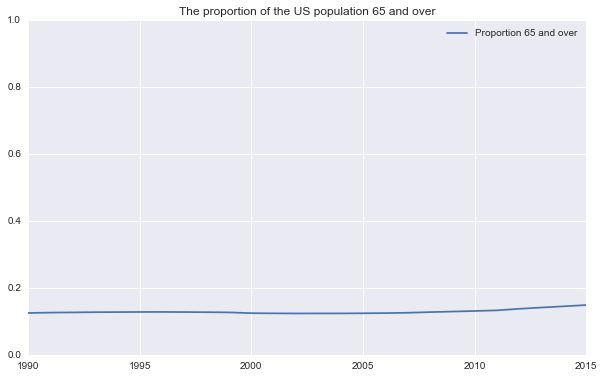

In [42]:
import re

#select the data for the 65 and over population and calculate what the proportion of the 
#population used to calculate the labor force they represent.

over65Rows = [r for r in age_pop.index.values if re.match('\d', r[1]) and int(r[:2]) > 64]

#The labor force is defined as 16 and older, but 15 is the closest we can do.
over65Prop = age_pop.loc[over65Rows, :].sum() / age_pop.sum()

plt.plot(over65Prop.index.values, over65Prop.values, label='Proportion 65 and over')

plt.legend(loc='best')
plt.ylim([0, 1])
plt.title('The proportion of the US population 65 and over')
plt.show()

The graph above shows a recent increase in the number proportion of people older than 65, though the trend isn't as pronounce as I would have thought, especially given the steady downward trend in labor force participation rates. This could be due in part to my how I calculated statistic. While the labor force participation rate includes the civilian, non-institutional population 16 and over, I calculated the proportion above by dividing the number of people 65 and older by the entire US population.